In [1]:
import sys
import time

import pandas as pd

import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=300)
np.set_printoptions(threshold=300)

import torch
torch.set_printoptions(precision=4)
torch.set_printoptions(linewidth=300)
torch.set_printoptions(threshold=300)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm, colors

import helpers_augmented as ha

import os
print(os.getcwd())

import init_load_board as ib 
import init_simple_mdp as imdp

import function_board as fb 
import function_tool as ft

#%%
data_parameter_dir = fb.data_parameter_dir
result_dir = './result'       



/Users/rachael/Desktop/darts-thesis
/Users/rachael/Desktop/darts-thesis


In [2]:
# playerID_list = [1,2,3]
playerID_list = [10]
epsilon_list = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,32,64,128]

In [3]:
for epsilon in epsilon_list: 
    ha.evaluate_score_probability(playerID_list,epsilon=epsilon,f_density_grid_pixel_per_mm=0.5)

/Users/rachael/Desktop/darts-thesis
f_density_grid_num=171 f_density_grid_width=2.0

computing ./data_parameter/player_gaussin_fit/grid_full_augmented/e1_player10_gaussin_prob_grid.pkl


KeyboardInterrupt: 

In [ ]:
# Code to look at the probability grid

#####------------- Load the Probability Grid ---------------#####

# temp = h.load_prob_grid(playername_filename='player1',epsilon=1,data_parameter_dir=data_parameter_dir)

####------------------------ Output -------------------------####
# Probability grid contains a list of five objects
# 0 --> shape (341, 341, 61) for every point on the 341x341 grid, probability of hitting score 0 to 60 
# 1 --> shape (341, 341, 20) for every point on the 341x341 grid, probability of hitting single of index 0 to 20
# 2 --> shape (341, 341, 20) for every point on the 341x341 grid, probability of hitting double of index 0 to 20
# 3 --> shape (341, 341, 20) for every point on the 341x341 grid, probability of hitting triple of index 0 to 20
# 4 --> shape (341, 341, 2) for every point on the 341x341 grid, probability of hitting bullseye of index 0 (single) or 1 (double)

# temp[0].shape

In [14]:
for epsilon in epsilon_list: 
    ha.save_aiming_grid(playerID_list,epsilon=epsilon)

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full_augmented/e2_player10_gaussin_prob_grid.pkl
dump_pickle to ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e2_gaussin_prob_grid_custom_augmented.pkl

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full_augmented/e3_player10_gaussin_prob_grid.pkl
dump_pickle to ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e3_gaussin_prob_grid_custom_augmented.pkl

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full_augmented/e4_player10_gaussin_prob_grid.pkl
dump_pickle to ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e4_gaussin_prob_grid_custom_augmented.pkl

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full_augme

In [4]:
name_pa = 'player{}'.format(10)
data_parameter_dir = fb.data_parameter_dir

bullseye_probs = []
s_inner_probs = []
s_outer_probs = []
t_probs = []
d_probs = []

for epsilon in epsilon_list: 
    [aiming_grid, prob_grid_normalscore, prob_grid_singlescore, prob_grid_doublescore, prob_grid_triplescore, prob_grid_bullscore,prob_grid_singlescore_inner,prob_grid_singlescore_outer] = ha.load_aiming_grid(name_pa, epsilon=epsilon, data_parameter_dir=data_parameter_dir, grid_version='custom_augmented')
    bullseye_probs.append(prob_grid_bullscore[728].copy())
    s_inner_probs.append(prob_grid_singlescore_inner[728].copy())
    s_outer_probs.append(prob_grid_singlescore_outer[728].copy())
    t_probs.append(prob_grid_triplescore[728].copy())
    d_probs.append(prob_grid_doublescore[728].copy())


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e1_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e2_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e3_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e4_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e5_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e6_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e7_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/player10_e8_gaussin_prob_grid_custom_augmen

In [5]:
prob_list = []

for i in range(len(epsilon_list)):
    db_prob = bullseye_probs[i][1]
    sb_prob = bullseye_probs[i][0]
    s_inner_prob = sum(s_inner_probs[i][:])
    t_prob = sum(t_probs[i][:])
    s_outer_prob = sum(s_outer_probs[i][:])
    d_prob = sum(d_probs[i][:])
    miss = 1 - db_prob - sb_prob - s_inner_prob - t_prob - s_outer_prob - d_prob
    epsilon = epsilon_list[i]
    prob_list.append([epsilon,db_prob,sb_prob,s_inner_prob,t_prob,s_outer_prob,d_prob,miss])


In [6]:
df_skill = pd.DataFrame(prob_list,columns= ['epsilon','DB','SB','Inner Single','Triple','Outer Single','Double','Miss'])
df_skill = df_skill.round(4)
df_skill = df_skill.set_index('epsilon')
df_skill

,DB,SB,Inner Single,Triple,Outer Single,Double,Miss
epsilon,,,,,,,
1,0.3251,0.5270,0.1479,0.0000,0.0000,0.0000,0.0000
2,0.1796,0.4511,0.3693,0.0000,0.0000,0.0000,0.0000
3,0.1239,0.3662,0.5098,0.0000,0.0000,0.0000,-0.0000
4,0.0946,0.3043,0.6011,0.0000,0.0000,0.0000,-0.0000
5,0.0765,0.2592,0.6644,0.0000,0.0000,0.0000,0.0000
6,0.0642,0.2253,0.7105,0.0000,0.0000,0.0000,0.0000
7,0.0553,0.1991,0.7455,0.0001,0.0000,0.0000,0.0000
8,0.0485,0.1783,0.7729,0.0002,0.0001,0.0000,0.0000
9,0.0433,0.1613,0.7948,0.0004,0.0002,0.0000,0.0000


In [7]:
(df_skill*25).round(2)

,DB,SB,Inner Single,Triple,Outer Single,Double,Miss
epsilon,,,,,,,
1,8.13,13.18,3.70,0.00,0.00,0.00,0.00
2,4.49,11.28,9.23,0.00,0.00,0.00,0.00
3,3.10,9.16,12.74,0.00,0.00,0.00,-0.00
4,2.37,7.61,15.03,0.00,0.00,0.00,-0.00
5,1.91,6.48,16.61,0.00,0.00,0.00,0.00
6,1.60,5.63,17.76,0.00,0.00,0.00,0.00
7,1.38,4.98,18.64,0.00,0.00,0.00,0.00
8,1.21,4.46,19.32,0.00,0.00,0.00,0.00
9,1.08,4.03,19.87,0.01,0.00,0.00,0.00


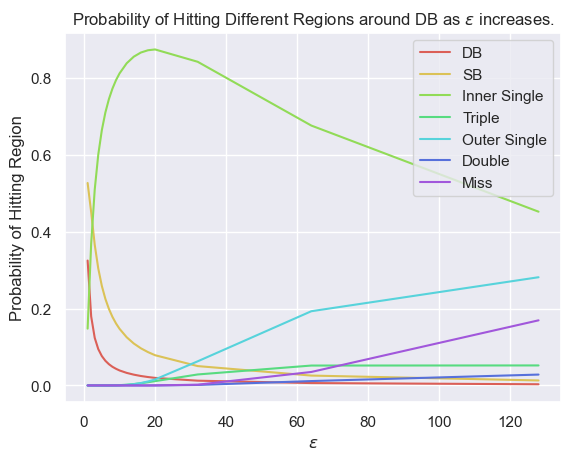

In [8]:
sns.set_theme()
sns.set_palette("hls", 8)
fig = df_skill.plot()
fig = plt.xlabel('$\epsilon$')
fig = plt.ylabel('Probability of Hitting Region')
fig = plt.title('Probability of Hitting Different Regions around DB as $\epsilon$ increases.')

In [9]:
print(prob_grid_singlescore[1])
print(prob_grid_singlescore_inner[1] + prob_grid_singlescore_outer[1])

[0.0602 0.01   0.0115 0.0482 0.0494 0.0211 0.0202 0.0363 0.0412 0.0143 0.0406 0.0461 0.0324 0.0419 0.0104 0.0297 0.0098 0.0563 0.015  0.0556]
[0.0602 0.01   0.0115 0.0482 0.0494 0.0211 0.0202 0.0363 0.0412 0.0143 0.0406 0.0461 0.0324 0.0419 0.0104 0.0297 0.0098 0.0563 0.015  0.0556]


In [10]:
imdp.a_list[1]

'SI20-c-m'